In [2]:
from ga_regression import *
from matplotlib import pyplot as plt
from functools import partial
import PIL
import matplotlib as mpl
from matplotlib.cm import ScalarMappable
from pvutils import iter_subplots
from pyvista import PolyData
import pyvista as pv
from scipy.stats import pearsonr

C:\Users\dg\.conda\envs\diffnet4\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
# RUN 9 / 10
file = Path(r"D:\resynth\run_09_10\run00009_resynth\2025-08-08-12-28-22\opts_and_metadata.pt")

# RUN 20 / 21
file = Path(r"D:\resynth\run_20_21\run00020_resynth\2025-08-09-07-18-37\opts_and_metadata.pt")

# run 38 / 39
file = Path(r"D:\resynth\run_38_39\run00038_resynth\2025-08-09-17-21-56\opts_and_metadata.pt")

# run 42 / 43
file = Path(r"D:\resynth\run_42_43\run00042_resynth\2025-08-10-07-01-41\opts_and_metadata.pt")

# run 48 / 49
file = Path(r"D:\resynth\run_48_49\run00048_resynth\2025-08-11-06-09-16\opts_and_metadata.pt")

# RUN 51 / 52
file = Path(r"D:\resynth\run_51_52\run00051_resynth\2025-08-07-12-07-53\opts_and_metadata.pt")

readers = Readers.from_file(file)

# to try:
# number of diffnet layers
# normalize verts?

In [4]:
readers.hparams.iloc[:, 3:]

,input_features,channel,k_eig,learning_rate,decay_every,decay_rate,n_blocks,dropout,n_faces,spike_window,weight_error,augment,use_visible,use_color,norm_verts,curr_learning_rate
0,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0010,5,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.907349e-09
1,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0010,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.953125e-06
2,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0010,15,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.562500e-05
3,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0010,20,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,6.250000e-05
4,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0001,5,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.907349e-10
5,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0001,10,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.953125e-07
6,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0001,15,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,1.562500e-06
7,xyz,"(0, 2, 29, 5, 17, 23, 14, 31, 18, 30, 7, 25, 3...",128,0.0001,20,0.5,4,False,500,"(0.07, 0.75)",None,None,None,None,None,6.250000e-06


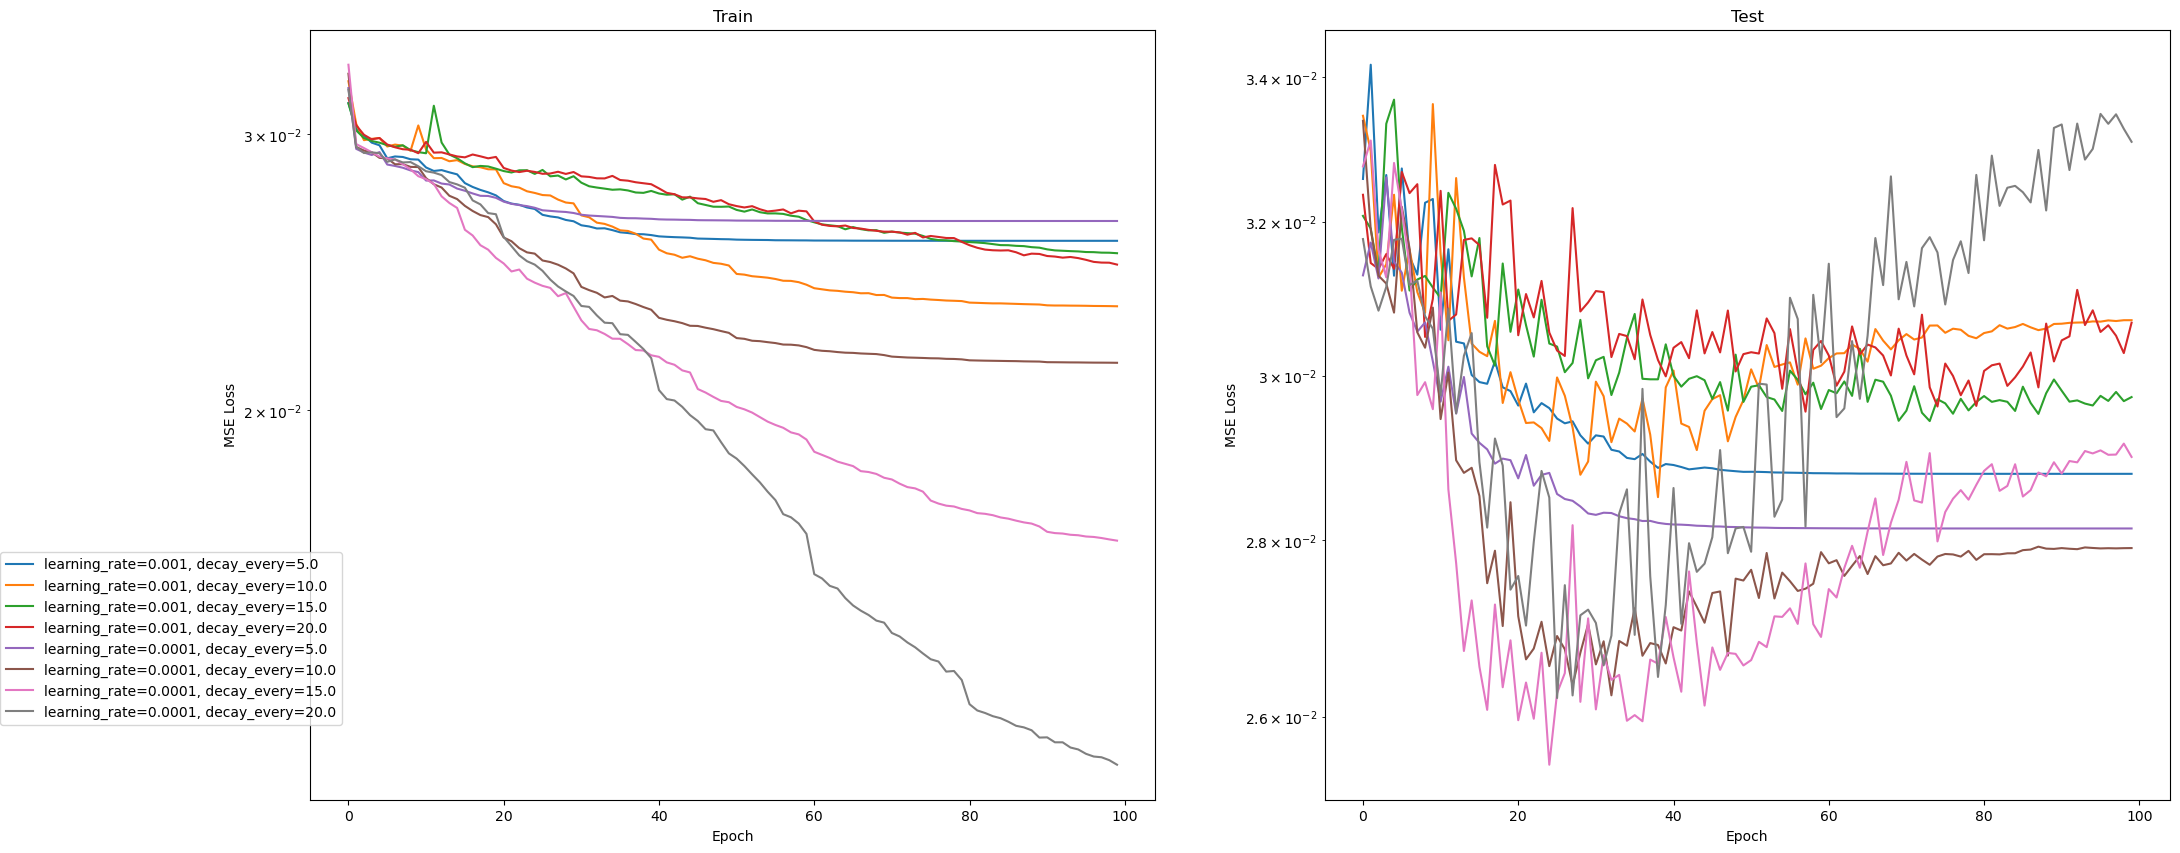

In [4]:
fig, axs = readers.plot_training(tags=None, mode='loss', legend=(0, .15), sharey=False, figsize=(24, 10))

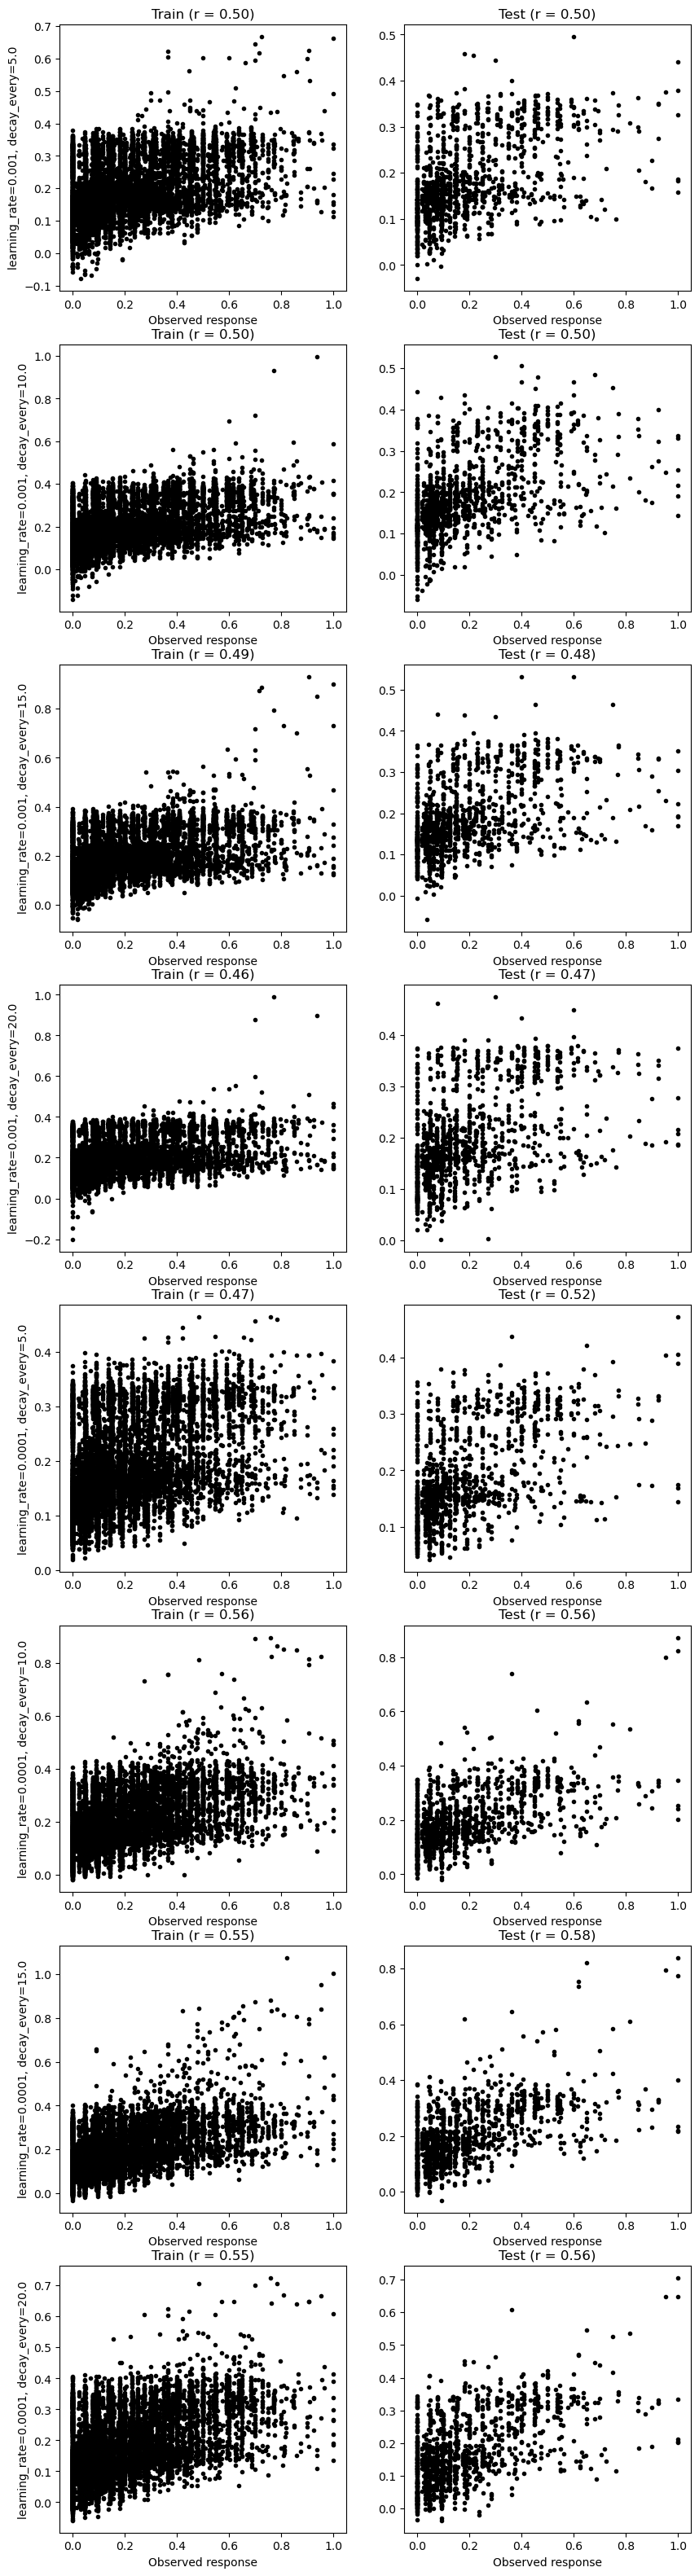

In [5]:
readers.scatter_plots(tags=None)  # TODO ability to load last-trained model